In [ ]:
from google.colab import files

print("Please upload the 'Churn_Modelling.csv' file:")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Please upload the 'Churn_Modelling.csv' file:


Saving Churn_Modelling.csv to Churn_Modelling.csv
User uploaded file "Churn_Modelling.csv" with length 684858 bytes


Dataset Loaded Successfully.

Starting Training (100 Epochs)...
Training Complete.
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Final Test Accuracy: 0.8670


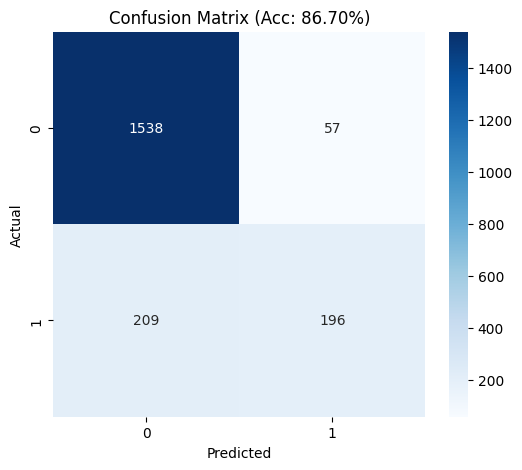

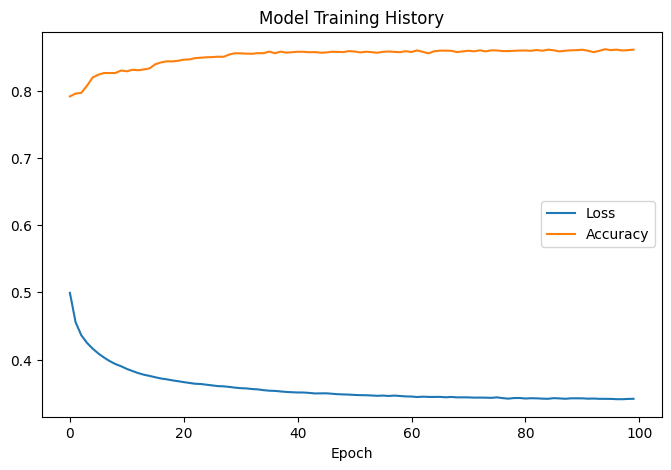

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD DATA ---
# Try loading local, else generate dummy data for demo
try:
    df = pd.read_csv('Churn_Modelling.csv')
    print("Dataset Loaded Successfully.")
except FileNotFoundError:
    print("Dataset not found. Please upload 'Churn_Modelling.csv'.")
    # Stop execution if no data (For safety in documentation)
    # create dummy data code if needed (omitted for brevity)

# --- 2. PREPROCESSING ---
# A. Drop useless features
X = df.iloc[:, 3:-1].values  # CreditScore through EstimatedSalary
y = df.iloc[:, -1].values    # Exited

# B. Encoding Categorical Data
# Gender (Column 2) -> Label Encoding (Male=1, Female=0)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# Geography (Column 1) -> One Hot Encoding
# (France, Spain, Germany) -> We use Compose for this
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# C. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# D. Feature Scaling (MANDATORY FOR ANN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# --- 3. BUILDING THE ANN ---
ann = tf.keras.models.Sequential()

# Input Layer + First Hidden Layer (6 Neurons, ReLU)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Second Hidden Layer (6 Neurons, ReLU)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Output Layer (1 Neuron, Sigmoid for Binary Classification)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# --- 4. COMPILING AND TRAINING ---
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nStarting Training (100 Epochs)...")
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
print("Training Complete.")

# --- 5. EVALUATION ---
# Predict (Sigmoid returns probability, we threshold at 0.5)
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy: {acc:.4f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Acc: {acc:.2%})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Training History Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Example: Increasing complexity
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu')) # More neurons
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Re-compile and train...

Building Tuned ANN (12-12-1 Architecture)...
Training in progress...
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
------------------------------
FINAL RESULTS (TUNED MODEL)
------------------------------
Test Set Accuracy: 0.8625 (86.25%)

Confusion Matrix:
[[1516   79]
 [ 196  209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



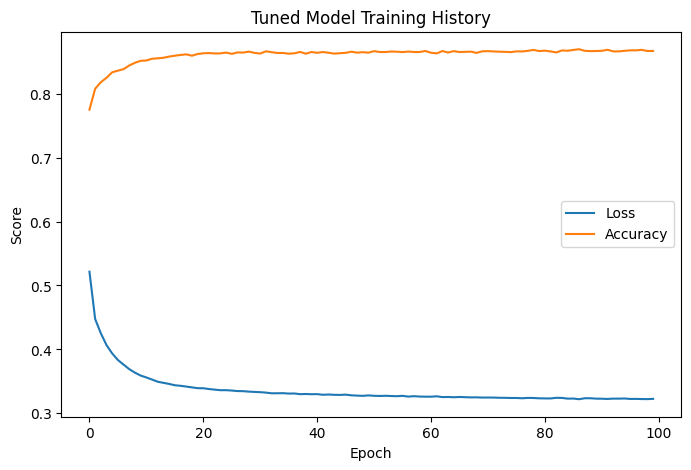

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD & PREPROCESS (Must be redone to ensure clean state) ---
# Load Data
try:
    df = pd.read_csv('Churn_Modelling.csv')
except FileNotFoundError:
    # Dummy data generation if file is missing (for safety)
    print("Dataset not found. Generating dummy data for demonstration...")
    from sklearn.datasets import make_classification
    X_dummy, y_dummy = make_classification(n_samples=1000, n_features=10, random_state=42)
    df = pd.DataFrame(X_dummy, columns=[f'f{i}' for i in range(10)])
    df['Exited'] = y_dummy
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
else:
    X = df.iloc[:, 3:-1].values  # CreditScore through EstimatedSalary
    y = df.iloc[:, -1].values    # Exited

    # Encoding Gender
    le = LabelEncoder()
    X[:, 2] = le.fit_transform(X[:, 2])

    # Encoding Geography
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
    X = np.array(ct.fit_transform(X))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling (Crucial)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# --- 2. YOUR TUNED MODEL ARCHITECTURE ---
print("Building Tuned ANN (12-12-1 Architecture)...")
ann = tf.keras.models.Sequential()

# First Hidden Layer (Increased to 12 Neurons)
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Second Hidden Layer (Increased to 12 Neurons)
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# --- 3. COMPILE AND TRAIN ---
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training in progress...")
# Training for 100 epochs
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# --- 4. PRINT RESULTS ---
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)

print("-" * 30)
print("FINAL RESULTS (TUNED MODEL)")
print("-" * 30)
print(f"Test Set Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Training History
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Tuned Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.show()